# GECAMTools v0.0.11.1_20221016_18使用说明

1. 所需环境  
    1.1 系统环境：windows、linux、mac  
    1.2 python环境：python版本>=3.6 (不建议安装python 3.9及以上版本)

2. 安装流程  
    2.1 下载源程序  
    gecamTools-master.zip  
    
    2.2 安装  
    2.2.1 仅使用基本功能(即无需生成响应矩阵)
    >   使用pip进行源码安装，自动安装GECAMTools以及相关依赖库
        `pip install gecamTools-master.zip`
        将会自动安装GECAMTools以及相关依赖库

        建议使用Anaconda创建独立的python环境使用，防止出现不同软件的依赖库版本不兼容问题。 [Miniconda使用说明](https://www.jianshu.com/p/7299c2d4d170)


    2.2.2 使用全部功能(包含生成响应矩阵)
    linux或mac中CALDB安装流程:
    >   (1) 从公共服务器上下载最新版的CALDB.(截止2022-03-18，最新版本CALDB的路径为：/gecamfs/soft/CALDB)
        (2) 标定库CALDB下载之后将source /your directory of caldb/software/tools/caldbinit.sh 这句话放环境文件里，
        /your directory of caldb 这个是用户下载下来的 CALDB 的目录
        (3) 完成之后， source 环境文件，可进入 python，通过 `import RSP_generator` 来检验标定库是否安装成功

    windows中CALDB安装流程(测试于win10):
    >   (1) 从公共服务器上下载最新版的CALDB.(截止2022-03-18，最新版本CALDB的路径为：/gecamfs/soft/CALDB)
        (2) 添加系统变量： 变量名为：CALDB， 地址为CALDB对应的根目录，例：E:\gecam\CALDB
        (3) 在python环境的site-packages中新建一个CALDB.pth文件
            可通过以下方法找到python或者conda对应的目录：
            >>> import os
            >>> os.path.dirname(os.__file__)
            >>> 'C:\\Users\\用户名\\.conda\\envs\\gecamTools\\lib'
            因此新建文件：C:\Users\用户名\\.conda\envs\gecamTools\Lib\site-packages\CALDB.pth
            CALDB.pth中内容为CALDB中software文件夹路径：
            E:\gecam\CALDB\software
        (4) 完成之后，可进入 python，通过 `import RSP_generator` 来检验标定库是否安装成功


    
    2.3 测试  
    `import gecam`

3. 卸载流程  
    `pip uninstall GECAMTools`



## 当前版本更新内容
1. 修复选取源时间段不包含触发时刻时，导致画光变时异常
2. 修复显示光变部分，计算误差错误

## 获取示例所用的测试数据

测试数据（gbg_evt_tn210511_112749_fb_v00.fits）的下载链接： [点击下载](https://ihepbox.ihep.ac.cn/ihepbox/index.php/s/iEE9AZQyNuJljr0)   

测试数据是通过IHEP BOX分享的，使用高能所账号登录即可

## 功能列表

1. 显示光变
2. 显示能谱
3. 生成能谱文件
4. 时间转换
5. 生成响应文件（依赖于GECAM CALDB）

# 1. 基本功能

## 1.1 时间转换

In [1]:
from gecam.time import GecamMet, HebsMet, HxmtMet

In [2]:
trig_met = 74431600.6

In [3]:
# 各个卫星选择不同的时间转换函数

# GECAM: GecamMet,  HEBS: HebsMet, HXMT: HxmtMet
met_func = GecamMet
# met转时间字符串
trig_time_str = met_func(trig_met).iso
# met转datetime
trig_datetime = met_func(trig_met).datetime
# met转MJD
trig_mjd = met_func(trig_met).mjd

trig_time_str, trig_datetime, trig_mjd

('2021-05-11T11:26:40.600000',
 datetime.datetime(2021, 5, 11, 11, 26, 40, 600000, tzinfo=datetime.timezone.utc),
 59345.4768587963)

In [4]:
# 时间字符串转met
met1 = met_func.from_iso(trig_time_str)
# datetime转met
met2 = met_func.from_datetime(trig_datetime)
# MJD转met
met3 = met_func.from_mjd(trig_mjd)

met1, met2, met3

(<GecamMet seconds = 74431600.600000>,
 <GecamMet seconds = 74431600.600000>,
 <GecamMet seconds = 74431600.600000>)

# 2. 多个探头批量分析

## 2.1 读取事例数据（1级daily或trigger事例数据）

In [1]:
from gecam.data.evt import Evt
from gecam.data.spec import SpecFile
from gecam.data.detector import GRD, CPD
from gecam.plot.light_curve import LightCurveFigure
from gecam.plot.spectrum import SpectrumFigure

import matplotlib.pyplot as plt

In [2]:
# 事例文件路径
evt_path = r"D:\sougou_download\gbg_evt_tn210511_112749_fb_v00.fits"
# evt_path=r"E:\gecamTools\test_hebs\gcg_evt_221014_19_v01.fits"
evt = Evt.open(evt_path)

### 2.1.1 批量选取探头

In [ ]:
# 示例：选取10个高增益，15个低增益
choose_det = []

choose_det.extend([GRD(number=i, gain_type="high") for i in range(1, 11)])

choose_det.extend([GRD(i, "low") for i in range(11, 26)])

[det.full_name for det in choose_det]

## 2.2 查看多个探头的叠加光变

cg01H
cg01L
cg02H


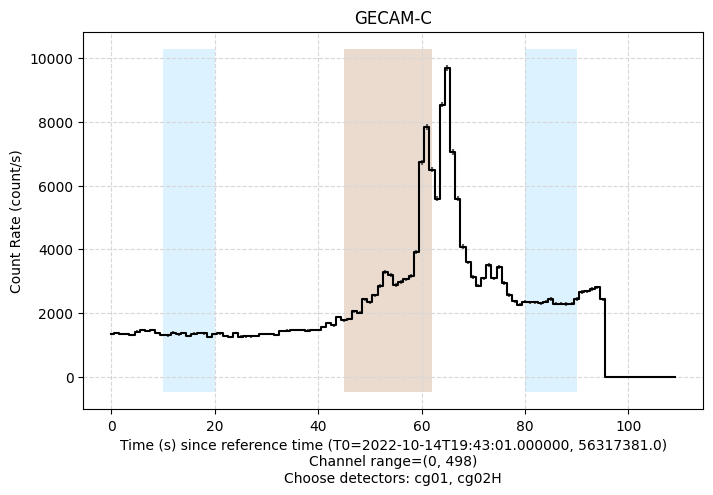

In [13]:
# 获取触发事例数据中的触发时间
trig_met = evt.info.trig_met
trig_met=56314731.0 + 2700
# 选择多个探头，例：GRD18（包含高低增益），GRD19(高增益)
chooose_det = [GRD(1, gain_type="both"), GRD(2, gain_type="high")]

# 光变的整体时间区间
lc_time_range = (trig_met - 50, trig_met + 60)
# 源时间区间
src_time_range = (trig_met - 5, trig_met + 12)
src_time_range2 = (trig_met + 9, trig_met + 15)
# 多段本底的时间区间
bg_time_range_list = [[trig_met - 40, trig_met - 30], [trig_met + 30, trig_met + 40]]
# 光变的时间bin，单位：秒
time_bin = 1

# 是否选取推荐事例，True:只选取推荐事例  False:选取全部事例
only_recommend = True

lc_data, lc_fig = evt.plot_light_curve(chooose_det, time_range=lc_time_range, time_bin=time_bin,
                                       only_recommend=only_recommend, src_range=src_time_range,
                                       bg_range=bg_time_range_list)
# lc_fig.axes[0].set_xlim([0,10])
lc_x, lc_y, _lc_y_err = lc_data

## 2.3 查看多个探头的叠加能谱

In [ ]:
# 获取触发事例数据中的触发时间
trig_met = evt.info.trig_met

# 选择多个探头，例：GRD18（包含高低增益），GRD19(高增益)
chooose_det = [GRD(18, gain_type="both"), GRD(19, gain_type="high")]

# 光变的整体时间区间
time_range = (trig_met - 50, trig_met + 60)
# 光变的时间bin，单位：秒
time_bin = 1

# 是否选取推荐事例，True:只选取推荐事例  False:选取全部事例
only_recommend = True

# 能道分bin， 整数(均匀分bin)或一维数组(自定义分bin)
channel_bin = 1
spectrum_data, steptrum_fig = evt.plot_spectrum(chooose_det, time_range=time_range,
                                                channel_bin=channel_bin, only_recommend=only_recommend)
plt.show()

## 2.4 生成多个探头的响应文件

In [ ]:
from gecam.data.posatt import PosAtt
from gecam.coord import radec_to_thetaphi
from gecam.utils import rsp_utils
from gecam.data.detector import GRD

# 读取posatt文件
posatt_obj = PosAtt.open(r"gb_posatt_tn210511_112749_v00.fits")

# 选定met时间，或使用触发时间 evt.info.trig_met
choose_met = 74431600.6

# 获取时间点对应的卫星姿态（四元数）
quat = posatt_obj.get_quat(choose_met)

# 设定源坐标（J2000）
# 或取出触发evt文件的header中存储的源坐标: ra,dec,err_radius=evt.info.loc
ra = 317.99
dec = 59.53

# 根据源的坐标和卫星姿态计算入射角（deg）
theta, phi = radec_to_thetaphi(ra, dec, quat)

# 选择探头(必须设定增益,high 或者 low)
choose_det = GRD(18, "high")
# 必须设置探头所属的卫星， a/b
choose_det.set_satellite("b")

# 设置响应文件输出的文件夹
out_dir = "/gecam/zhangpeng/test/spec/"

# 生成单个探头（单个响应）响应文件，返回响应文件的绝对路径
rsp_out_path = rsp_utils.generate_rsp_fits(choose_det.full_name, theta, phi, choose_met, out_dir)
rsp_out_path

In [ ]:
# 生成多个探头的响应文件（必须区分高低增益）
import os

det_rsp_list = []

for det in [GRD(18), GRD(19)]:
    temp_rsp_list = []
    for gain_type in ["high", "low"]:
        det.set_gain_type(gain_type)
        det.set_satellite("b")

        temp_rsp_path = rsp_utils.generate_rsp_fits(det.full_name, theta, phi, choose_met, out_dir)
        temp_rsp_list.append(os.path.basename(temp_rsp_path))
        print(temp_rsp_path)

    det_rsp_list.append(temp_rsp_list)

det_rsp_list

## 2.5 生成多个探头的能谱文件

In [16]:
trig_met = evt.info.trig_met
trig_met=56314731.0 + 2700
choose_det = [GRD(1), GRD(2)]

# 能道分bin，[高增益，低增益]
# 整数(均匀分bin，0-498)或一维数组(自定义分bin)
channel_bins_high = 1
channel_bins_low = 1
channel_bins = [channel_bins_high, channel_bins_low]

time_bin = 1

# 多段本底时间区间
bg_range_list = [[trig_met - 40, trig_met - 10],
                 [trig_met - 40, trig_met - 10]]

# 源时间段，列表（可选择多个源时间段）
src_range_list = [
    [trig_met + 1, trig_met + 5], [trig_met + 5, trig_met + 15]
]

# 本底拟合方法，目前只有 "2pass"
bg_fit_method = "2pass"
# 本底拟合阶次
bg_fit_order = 1
# 是否只选取推荐事例
only_recommend = True

# 每个探头对应的响应文件路径（区分高低增益），建议使用相对路径
# rsp_list = [
#     ["grd18_high_gain_rsp_path", "grd18_low_gain_rsp_path"],
#     ["grd19_high_gain_rsp_path", "grd19_low_gain_rsp_path"]
# ]
# 当前设置为None,可使用上一节生成的 'det_rsp_list'
rsp_list = None

# 能谱文件的输出文件夹
out_dir = r"/gecam/zhangpeng/test/spec/"
out_dir = r"E:\gecamTools\test4/"

spec_data = evt.generate_spec_file(choose_det, src_range_list, channel_bins, bg_range_list, rsp_list,
                                   time_bin, bg_fit_method, bg_fit_order, only_recommend, out_dir)


cg01H


C:\Users\10500\PycharmProjects\gecamTools\gecam\fitting\polynomial_fitter.py:266: RankWarning: The fit may be poorly conditioned
  self._coeffs[i] = self._weighted_leastsq(X, y[i], w[i], False)
C:\Users\10500\PycharmProjects\gecamTools\gecam\fitting\polynomial_fitter.py:204: RuntimeWarning: background model has negative value in following channel(s) (starting from 0): 14, 158, 182, 187

This error maybe eliminated by reducing the order of polynomial (the current is 1).
  RuntimeWarning


cg01L


C:\Users\10500\PycharmProjects\gecamTools\gecam\fitting\polynomial_fitter.py:204: RuntimeWarning: background model has negative value in following channel(s) (starting from 0): 200, 205, 209, 217, 226, 232, 234, 239, 319, 320, 329, 332, 339, 343, 344, 347, 359, 367, 370, 383, 396, 398, 400, 406

This error maybe eliminated by reducing the order of polynomial (the current is 1).
  RuntimeWarning


cg02H


C:\Users\10500\PycharmProjects\gecamTools\gecam\fitting\polynomial_fitter.py:204: RuntimeWarning: background model has negative value in following channel(s) (starting from 0): 177, 190, 196

This error maybe eliminated by reducing the order of polynomial (the current is 1).
  RuntimeWarning


cg02L


C:\Users\10500\PycharmProjects\gecamTools\gecam\fitting\polynomial_fitter.py:280: RuntimeWarning: background model has negative value in following channel(s) (starting from 0): 334, 338, 370, 378

This error maybe eliminated by reducing the order of polynomial (the current is 1).
  RuntimeWarning
C:\Users\10500\PycharmProjects\gecamTools\gecam\fitting\polynomial_fitter.py:204: RuntimeWarning: background model has negative value in following channel(s) (starting from 0): 206, 210, 211, 212, 214, 215, 222, 223, 224, 225, 227, 228, 234, 235, 237, 238, 240, 245, 247, 251, 252, 254, 257, 278, 279, 285, 288, 291, 304, 309, 313, 319, 320, 327, 331, 334, 338, 341, 347, 357, 362, 363, 369, 370, 377, 378, 380, 382, 410

This error maybe eliminated by reducing the order of polynomial (the current is 1).
  RuntimeWarning


In [ ]:
spec_data.keys()

In [ ]:
# 查看bg18H的能谱数据
spec_data_bg18H = spec_data.get("bg18H")
# 查看生成能谱前的总光变和本底光变
bg18H_lc = spec_data_bg18H.get("lc")
bg18H_bg_lc = spec_data_bg18H.get("bg_lc")

spec_list_bg18H = spec_data_bg18H.get("src_spec_list")

# 查看第一个时间段源的能谱数据
spec_list_bg18H_src1 = spec_list_bg18H[0]

src_range1, spec_bg18H, bg_spec_bg18H, net_spec_bg18H = spec_list_bg18H_src1

In [ ]:
bg18H_bg_lc.src

In [ ]:
# 示例：检查bg18H在拟合光变时是否存在错误（参考后续的细致分析）
det_sliced_c_lc_fig = LightCurveFigure(bg18H_lc.get_plot_data(), trig_time=trig_met,
                                       satellite=evt.info.satellite_full_name)
# 标记本底范围的阴影
det_sliced_c_lc_fig.add_background(bg18H_bg_lc.get_plot_data(),
                                   bg_time_range=bg18H_bg_lc.bg_time_range, label="bg")

# 查看bg18H的本底拟合评价
# channel_range=[10,200]
# bg18H_bg_lc.show_fitting_quality(channel_range=channel_range)
# plt.show()

In [ ]:
# 能谱数据
# channel的每个bin的边界
channel_bins = spec_bg18H.channel_bins
# energy的每个bin的边界
energy_bins = spec_bg18H.energy_bins
# 每个channel bin的计数
counts = spec_bg18H.counts
# 每个channel bin的计数误差
count_err = spec_bg18H.counts_err

# 3 单个探头细致分析

## 3.1 读取事例文件

In [3]:
evt_path = r"D:\sougou_download\gbg_evt_tn210511_112749_fb_v00.fits"
evt = Evt.open(evt_path)

## 3.2 过滤出单个探头的数据

In [4]:
# 过滤出探头18的数据
det_events = evt.select_detector(18)

## 3.3 对于单个探头的事例，进一步过滤

### 3.3.1 如果后续将使用该数据生成能谱文件，则必须过滤增益，不能选择全增益

In [5]:
# 对于探头数据进一步的数据过滤，增益、时间范围、能量范围、能道范围、是否只使用推荐事例

# 根据增益过滤，both:全增益， high:高增益， low：低增益
# gain_type=None,

# 根据时间过滤
#time_range=None,

# 过滤能量范围或能道范围，不同时进行，如果channel_range不为None,则只过滤channel
#energy_range=None,
#channel_range=None,

# 是否只选取推荐事例
#only_recommend=True
det_sliced_events = det_events.slice(gain_type="high", only_recommend=True)

## 3.4 从过滤后的数据中提取分能段的光变

In [7]:
# 提取触发时间
trig_met = evt.info.trig_met

# 光变的总时间范围（绝对时间）
lc_time_range = (trig_met - 50, trig_met + 60)

# 定义源时间段
src_time_range = [trig_met - 20, trig_met + 30]
# 定义本底时间段
bg_time_range_list = [[trig_met - 40, trig_met - 30],
                      [trig_met + 25, trig_met + 60]]

# 时间bin，单位秒
time_bin = 2
# 能道分bin，整数为均匀分bin，一维列表为自定义分bin
channel_bin = 1

det_sliced_lc = det_sliced_events.to_light_curve(lc_time_range, time_bin, channel_bin)
# 本底拟合，拟合阶次为2
det_sliced_bg_lc = det_sliced_lc.fit_background(bg_time_range_list, fit_order=2)
# 提取源时间段的光变
det_src_lc = det_sliced_events.to_light_curve(src_time_range, time_bin, channel_bin)

C:\Users\10500\PycharmProjects\gecamTools\gecam\fitting\polynomial_fitter.py:266: RankWarning: The fit may be poorly conditioned
  self._coeffs[i] = self._weighted_leastsq(X, y[i], w[i], False)
C:\Users\10500\PycharmProjects\gecamTools\gecam\fitting\polynomial_fitter.py:204: RuntimeWarning: background model has negative value in following channel(s) (starting from 0): 170, 171

This error maybe eliminated by reducing the order of polynomial (the current is 2).
  RuntimeWarning


## 3.5 画出合并所有能段的光变

In [ ]:
# 画出总时长光变（合并各个能段）
det_sliced_lc_fig = LightCurveFigure(det_sliced_lc.get_plot_data(), trig_time=trig_met, dpi=100,
                                     satellite=evt.info.satellite_full_name)
# 画出本底
det_sliced_lc_fig.add_background(det_sliced_bg_lc.get_plot_data(),
                                 bg_time_range=det_sliced_bg_lc.bg_time_range)
# 画出源时间段的阴影
det_sliced_lc_fig.add_selection(det_src_lc.get_plot_data())
det_sliced_lc_fig.show_legend()
plt.show()

## 3.6 查看各个能段的拟合结果评价

In [ ]:
# 选择查看，并道后的第10至100道的拟合结果评价指标，None:为查看所有道
# 当前指标越接近1越好
channel_range = [10, 200]
det_sliced_bg_lc.show_fitting_quality(channel_range=channel_range)
plt.show()


# 对于某个能道拟合效果不好，
# 则后续程序，可查看该能段的光变，或重新单独拟合该能段的本底

## 3.7 画出能段序号为100的光变

In [ ]:
# 设置能段序号为100 （如果生成分能段光变时有进行并道，则选取并道后的能段序号）
choose_channel_index = 100

# 过滤选取能段的光变
channel_lc = det_sliced_lc.get_channel_lc(choose_channel_index)  # 总长度光变
channel_src_lc = det_src_lc.get_channel_lc(choose_channel_index)  # 源区间光变
channel_bg_lc = det_sliced_bg_lc.get_channel_lc(choose_channel_index)  #本底区间光变

# 画光变
det_sliced_c_lc_fig = LightCurveFigure(channel_lc.get_plot_data(), trig_time=trig_met,
                                       satellite=evt.info.satellite_full_name)
# 标记本底范围的阴影
det_sliced_c_lc_fig.add_background(channel_bg_lc.get_plot_data(),
                                   bg_time_range=channel_bg_lc.bg_time_range, label="bg")
#  标记源时间段
det_sliced_c_lc_fig.add_selection(channel_src_lc.get_plot_data(), label="src")
det_sliced_c_lc_fig.show_legend()
# plt.show()

## 3.8 调整单个能段的本底拟合

In [ ]:
# 选择能段序号为100，（如果生成分能段光变时有进行并道，则选取并道后的能段序号）
choose_channel_index = 100

bg_time_range_list2 = [[trig_met - 20, trig_met - 10], [trig_met + 20, trig_met + 40]]
fit_order = 2

channel_lc = det_sliced_lc.get_channel_lc(choose_channel_index)
channel_bg_lc = channel_lc.fit_background(bg_time_range_list2, fit_order=fit_order)
print(channel_bg_lc.fit_info)

channel_src_lc = det_src_lc.get_channel_lc(choose_channel_index)

det_c_lc_fig = LightCurveFigure(channel_lc.get_plot_data(), trig_time=trig_met)
det_c_lc_fig.add_background(channel_bg_lc.get_plot_data(),
                            bg_time_range=channel_bg_lc.bg_time_range, label="bg")
det_c_lc_fig.add_selection(channel_src_lc.get_plot_data(), label="src")
det_c_lc_fig.show_legend()

## 3.9 生成当前探头的能谱

In [ ]:
# 生成能谱文件的数据,时间分解谱

src_time_range = (trig_met - 1, trig_met + 9)
spec_file = SpecFile(det_sliced_lc, det_sliced_bg_lc)
# 添加第一个源时间段
spec, bg_spec, net_spec = spec_file.add_src(src_time_range)

# 添加第二个源时间段
src_time_range2 = (trig_met + 9, trig_met + 15)
spec2, bg_spec2, net_spec2 = spec_file.add_src(src_time_range2)

## 3.10 查看能谱

In [ ]:
# 画出能谱文件的数据（当前选择第一段源时间段的能谱）
spec_fig = SpectrumFigure()
spec_fig.add_data(spec.get_plot_data(), color="#474747", err_color="#474747", label="full-spec", linewidth=1)
spec_fig.add_data(bg_spec.get_plot_data(), color="#0c5da5", err_color="#0c5da5", label="bg-spec", linewidth=1)
spec_fig.add_data(net_spec.get_plot_data(), color="#16bf55", err_color="#16bf55", label="net-spec", linewidth=1)

# 截断显示
spec_fig.set_xlim([0, 200])
spec_fig.show_legend()
plt.show()


## 3.10 输出能谱到能谱文件中

In [ ]:

# 能谱对应的响应文件
rsp_path = "test.rsp"
out_dir = r"./"
spec_file.write(out_dir, rsp_path=rsp_path)

In [35]:
import numpy as np

In [36]:
x = np.array([('Rex', 9, 81.0), ('Fido', 3, 27.0)],
             dtype=[('name', 'U10'), ('age', 'i4'), ('weight', 'f4')])

In [37]:
x

array([('Rex', 9, 81.), ('Fido', 3, 27.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

In [38]:
x.field("name")

AttributeError: 'numpy.ndarray' object has no attribute 'field'

In [18]:
a=evt.info.ebounds

In [24]:
a

FITS_rec([(  0, 2.00000000e+00, 2.18290472e+00),
          (  1, 2.18290472e+00, 2.38076806e+00),
          (  2, 2.38076806e+00, 2.59450531e+00),
          (  3, 2.59450531e+00, 2.82503629e+00),
          (  4, 2.82503629e+00, 3.07327747e+00),
          (  5, 3.07327747e+00, 3.34013295e+00),
          (  6, 3.34013295e+00, 3.62648249e+00),
          (  7, 3.62648249e+00, 3.93317103e+00),
          (  8, 3.93317103e+00, 4.26099777e+00),
          (  9, 4.26099777e+00, 4.61070251e+00),
          ( 10, 4.61070251e+00, 4.98295498e+00),
          ( 11, 4.98295498e+00, 5.37834454e+00),
          ( 12, 5.37834454e+00, 5.79736757e+00),
          ( 13, 5.79736757e+00, 6.24041939e+00),
          ( 14, 6.24041939e+00, 6.70778799e+00),
          ( 15, 6.70778799e+00, 7.19964552e+00),
          ( 16, 7.19964552e+00, 7.71604872e+00),
          ( 17, 7.71604872e+00, 8.25693417e+00),
          ( 18, 8.25693417e+00, 8.82212257e+00),
          ( 19, 8.82212257e+00, 9.41132069e+00),
          ( 20, 9.41

In [21]:
recordarr = np.rec.array(a,dtype=[('foo', 'i4'),('bar', 'f4'),('bar2', 'f4')])

ValueError: When changing to a larger dtype, its size must be a divisor of the total size in bytes of the last axis of the array.

In [45]:
recordarr

rec.array([(1, 2. ), (2, 3.3)],
          dtype=[('foo', '<i4'), ('bar', '<f4')])

In [25]:
type(1) == int

True

In [1]:
import numpy as np

In [2]:
a=np.array([1,2,3,4,5,6])

In [6]:

a=1
b=0.05

In [7]:
np.ceil(a/b).astype(int)

20

In [28]:
# **kwargs传递一个可变的字典给函数实参
def test2(a1,a2=1,*args,**kwargs):
    print('必须传入的参数：',a1)
    print('类型分别为：{0},{1}'.format(type(args),type(kwargs)))
    for i in args:
        print('args可选参数:',i)
    for k,v in kwargs.items():
        print('kwargs可选参数：%s==>%s' % (k,v))

    kwargs.get()
test2(33,89,90,k1='Tony',k2='张国荣',k3='周传雄')


必须传入的参数： 33
类型分别为：<class 'tuple'>,<class 'dict'>
args可选参数: 90
kwargs可选参数：k1==>Tony
kwargs可选参数：k2==>张国荣
kwargs可选参数：k3==>周传雄
